<a href="https://colab.research.google.com/github/skdarkey/Selorm_Portfolio/blob/main/Boston_House_Prices_Valuation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Boston House Price Predicion Challenge

### Completed By Selorm Komla Darkey.

### This same project was completed using Deep leaning approach with Tensorflow. That notebook can also be seen [here](https://colab.research.google.com/drive/1TT5bIiODtkGjMv7euGJG0eNrqBtBVLhp#scrollTo=VG-13XZZk7ZC)

# Task

Building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

### Dataset: Boston House Prices and Home characteristics historical dataset.


Steps completed to accomplish this task:

1. Analysing and exploring the Boston house price data
2. Spliting the data for training (80%) and testing (20%)
3. Built a Multivariable Regression Model with 14 characteristics of homes.
4. Evaluating the model's accuracy using the coefficients and residuals
5. Using data transformation to improve your model performance if needed
6. Using the final model to estimate a new property's best selling price

### Notebook Presentation. Let's dive in



In [ ]:
## Importing relevant libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Setting  data display format
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Loading the Home Prices Dataset as csv
data = pd.read_csv('boston.csv', index_col=0)


**Features of the Homes in the Dataset:**  

    :Number of Instances: 506

    :Number of Attributes: 13 categorical predictive features. One target value (PRICE).

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.


# Preliminary Data Exploration 🔎
### Quote: "What will it benefit the data scientist if he does not understand the data he is working with" (Selorm 2023 😀)

*So here I explored the dataset. Specifically checking:

* Number of rows and column in the data.
* What are the column names?
* Are there any missing values or duplicates so I can fix them?

In [ ]:
# No of Columns and Rows
data.shape # 506 data points

(506, 14)

In [ ]:
# Column names
data.columns # column names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
# Inspecting the top 5
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [ ]:
# checking for missing values
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [ ]:
# checking for duplicates in data
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


# Visualising the Features to understand their inherent distributions.

### The inherent distribution of the features helps to understand the final model parameters and justify the assumption of the model selected for this task.

#### House Prices 💰

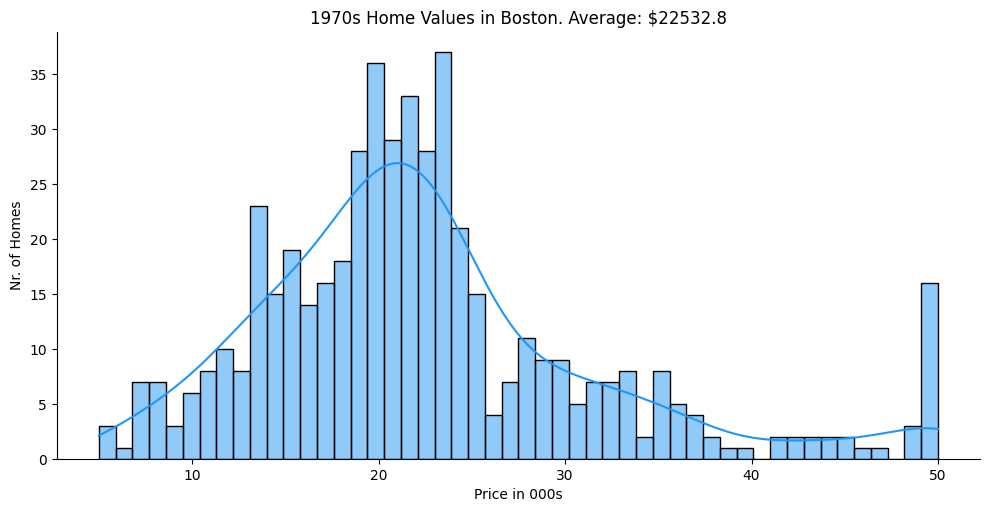

In [ ]:
# ploting the house prices data to understand the general distribution of home prices in the dataset
sns.displot(data['PRICE'],         # using seaborn
            bins=50,
            aspect=2,              # ratio of height to width
            kde=True,              # Adding Kernel Density Estimate curve
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

#### Distance to Employment - Length of Commute

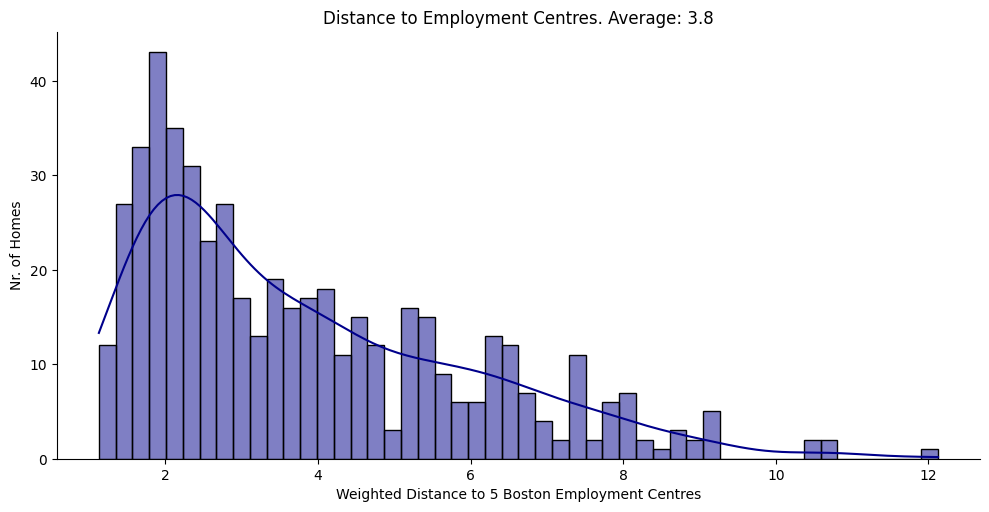

In [ ]:
# Understanding the distribution in Distance to 'Employment Centres' feature
sns.displot(data.DIS,
            bins=50,
            aspect=2,
            kde=True,
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

This distribution shows that most homes are about 4 miles away from work. Also, there are fewer and fewer homes the further out we move away from the city's 5 major employment sectors.

#### Number of Rooms

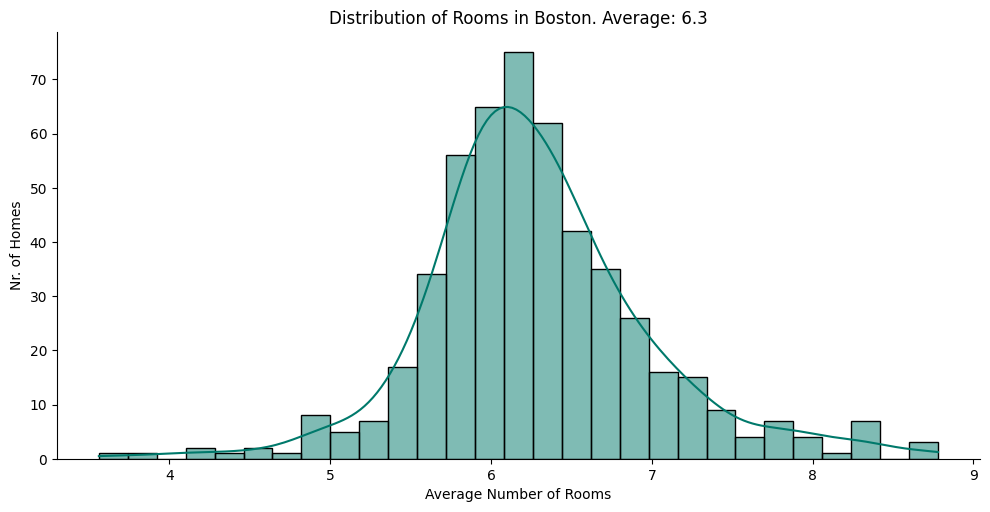

In [ ]:
# Understanding the distribution in Number of Rooms feature
sns.displot(data.RM,               # using Seaborn
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

The distribution shows average number of rooms in Boston homes in the 1970s is 6 rooms.

#### Access to Highways 🛣

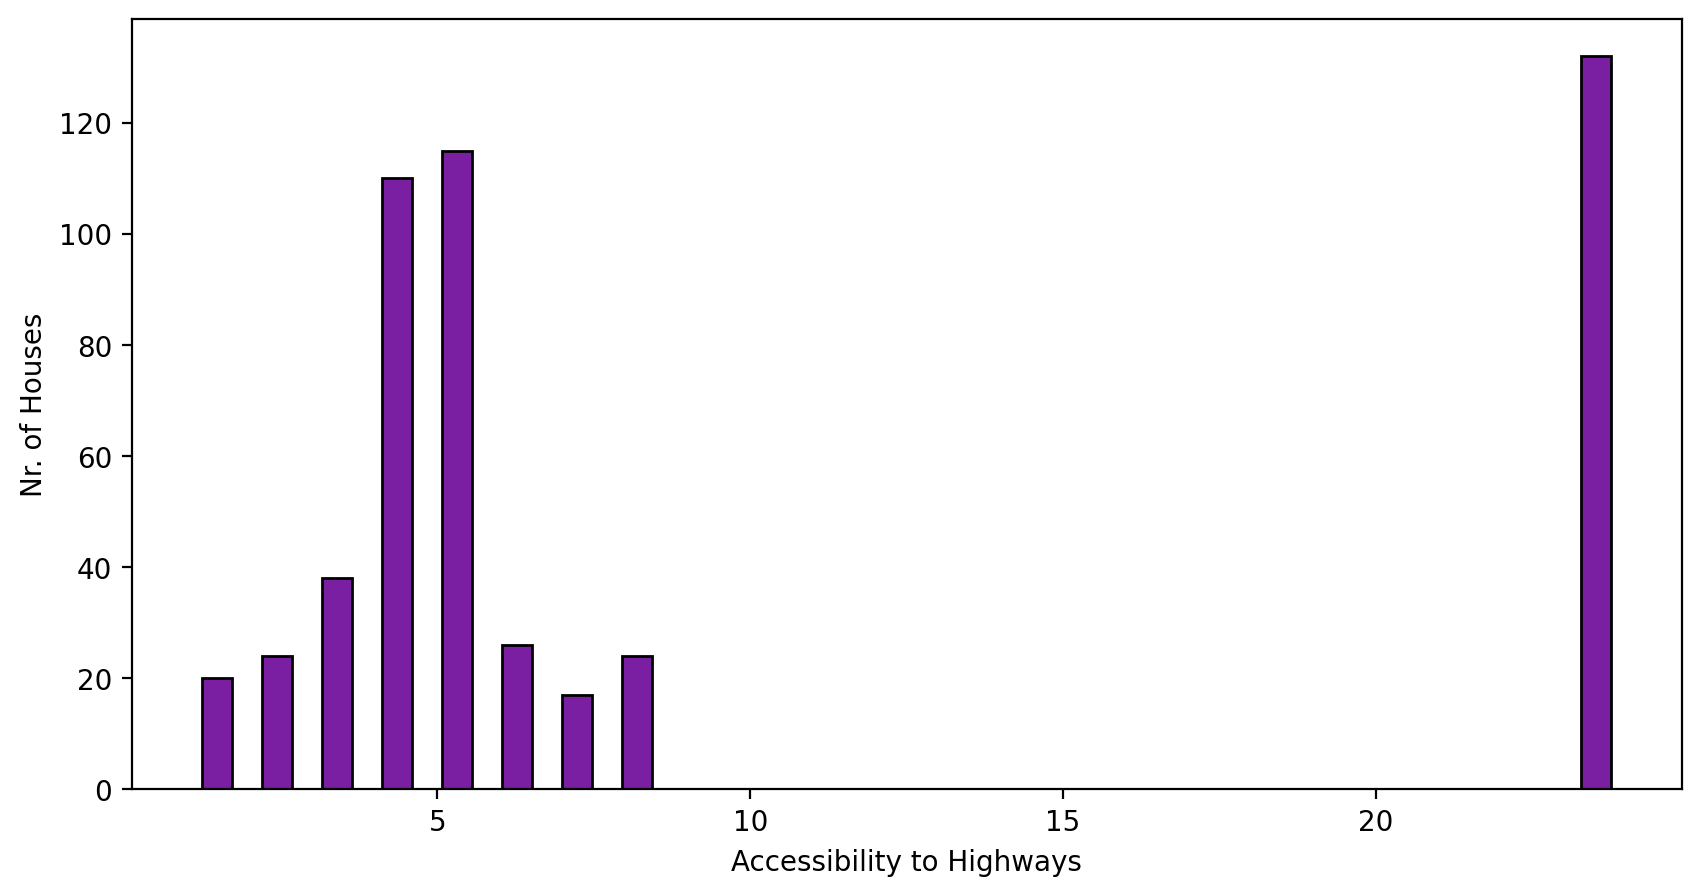

In [ ]:
# Understanding the inherent distribution the 'Distance to Highway' feature
plt.figure(figsize=(10, 5), dpi=200)         # using matplotlib

plt.hist(data['RAD'],
         bins=24,
         ec='black',     # edge color
         color='#7b1fa2',
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. The distribution shows while there are good number of houses closer to highways, there are also a huge number of them that do not have immediate access to highway.

#### Next to the River? ⛵️

###### Yes, I have to check this one because its a dream to be fulfilled. A house by the river, oh boy 🕺


In [ ]:
# plotly chart to show number of homes next to the river versus far away from it
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.deep,   # haline, amp
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?',
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

The bar chart shows many more homes are away from the river versus next to it. We see that out of the total number of 506 homes, only 35 are located next to the Charles River. Yes, that's the reality but I will still chase the dream for now. (Img source: clarendonsquare.com)

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

## Now let's Understand the Relationships in the Data. Here I explore  the relationship between some of the features. I believe, apart from the individual distribution of the features, gaining understanding on how some of the features correlate with each other and the home prices will help to understand the final model's weight and bias parameters in determining the home prices.

Come with your magnifying glass 🔎, let's explore some feature correlations.

Wait, before we go on let's make some hypothesis based on our knowldege of the world :

* What would you expect the relationship to be between level of pollution (NOX) and the distance to employment (DIS)? 🤔
* What kind of relationship should we expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?

Now, let's check our assupmptions.
I use [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time.

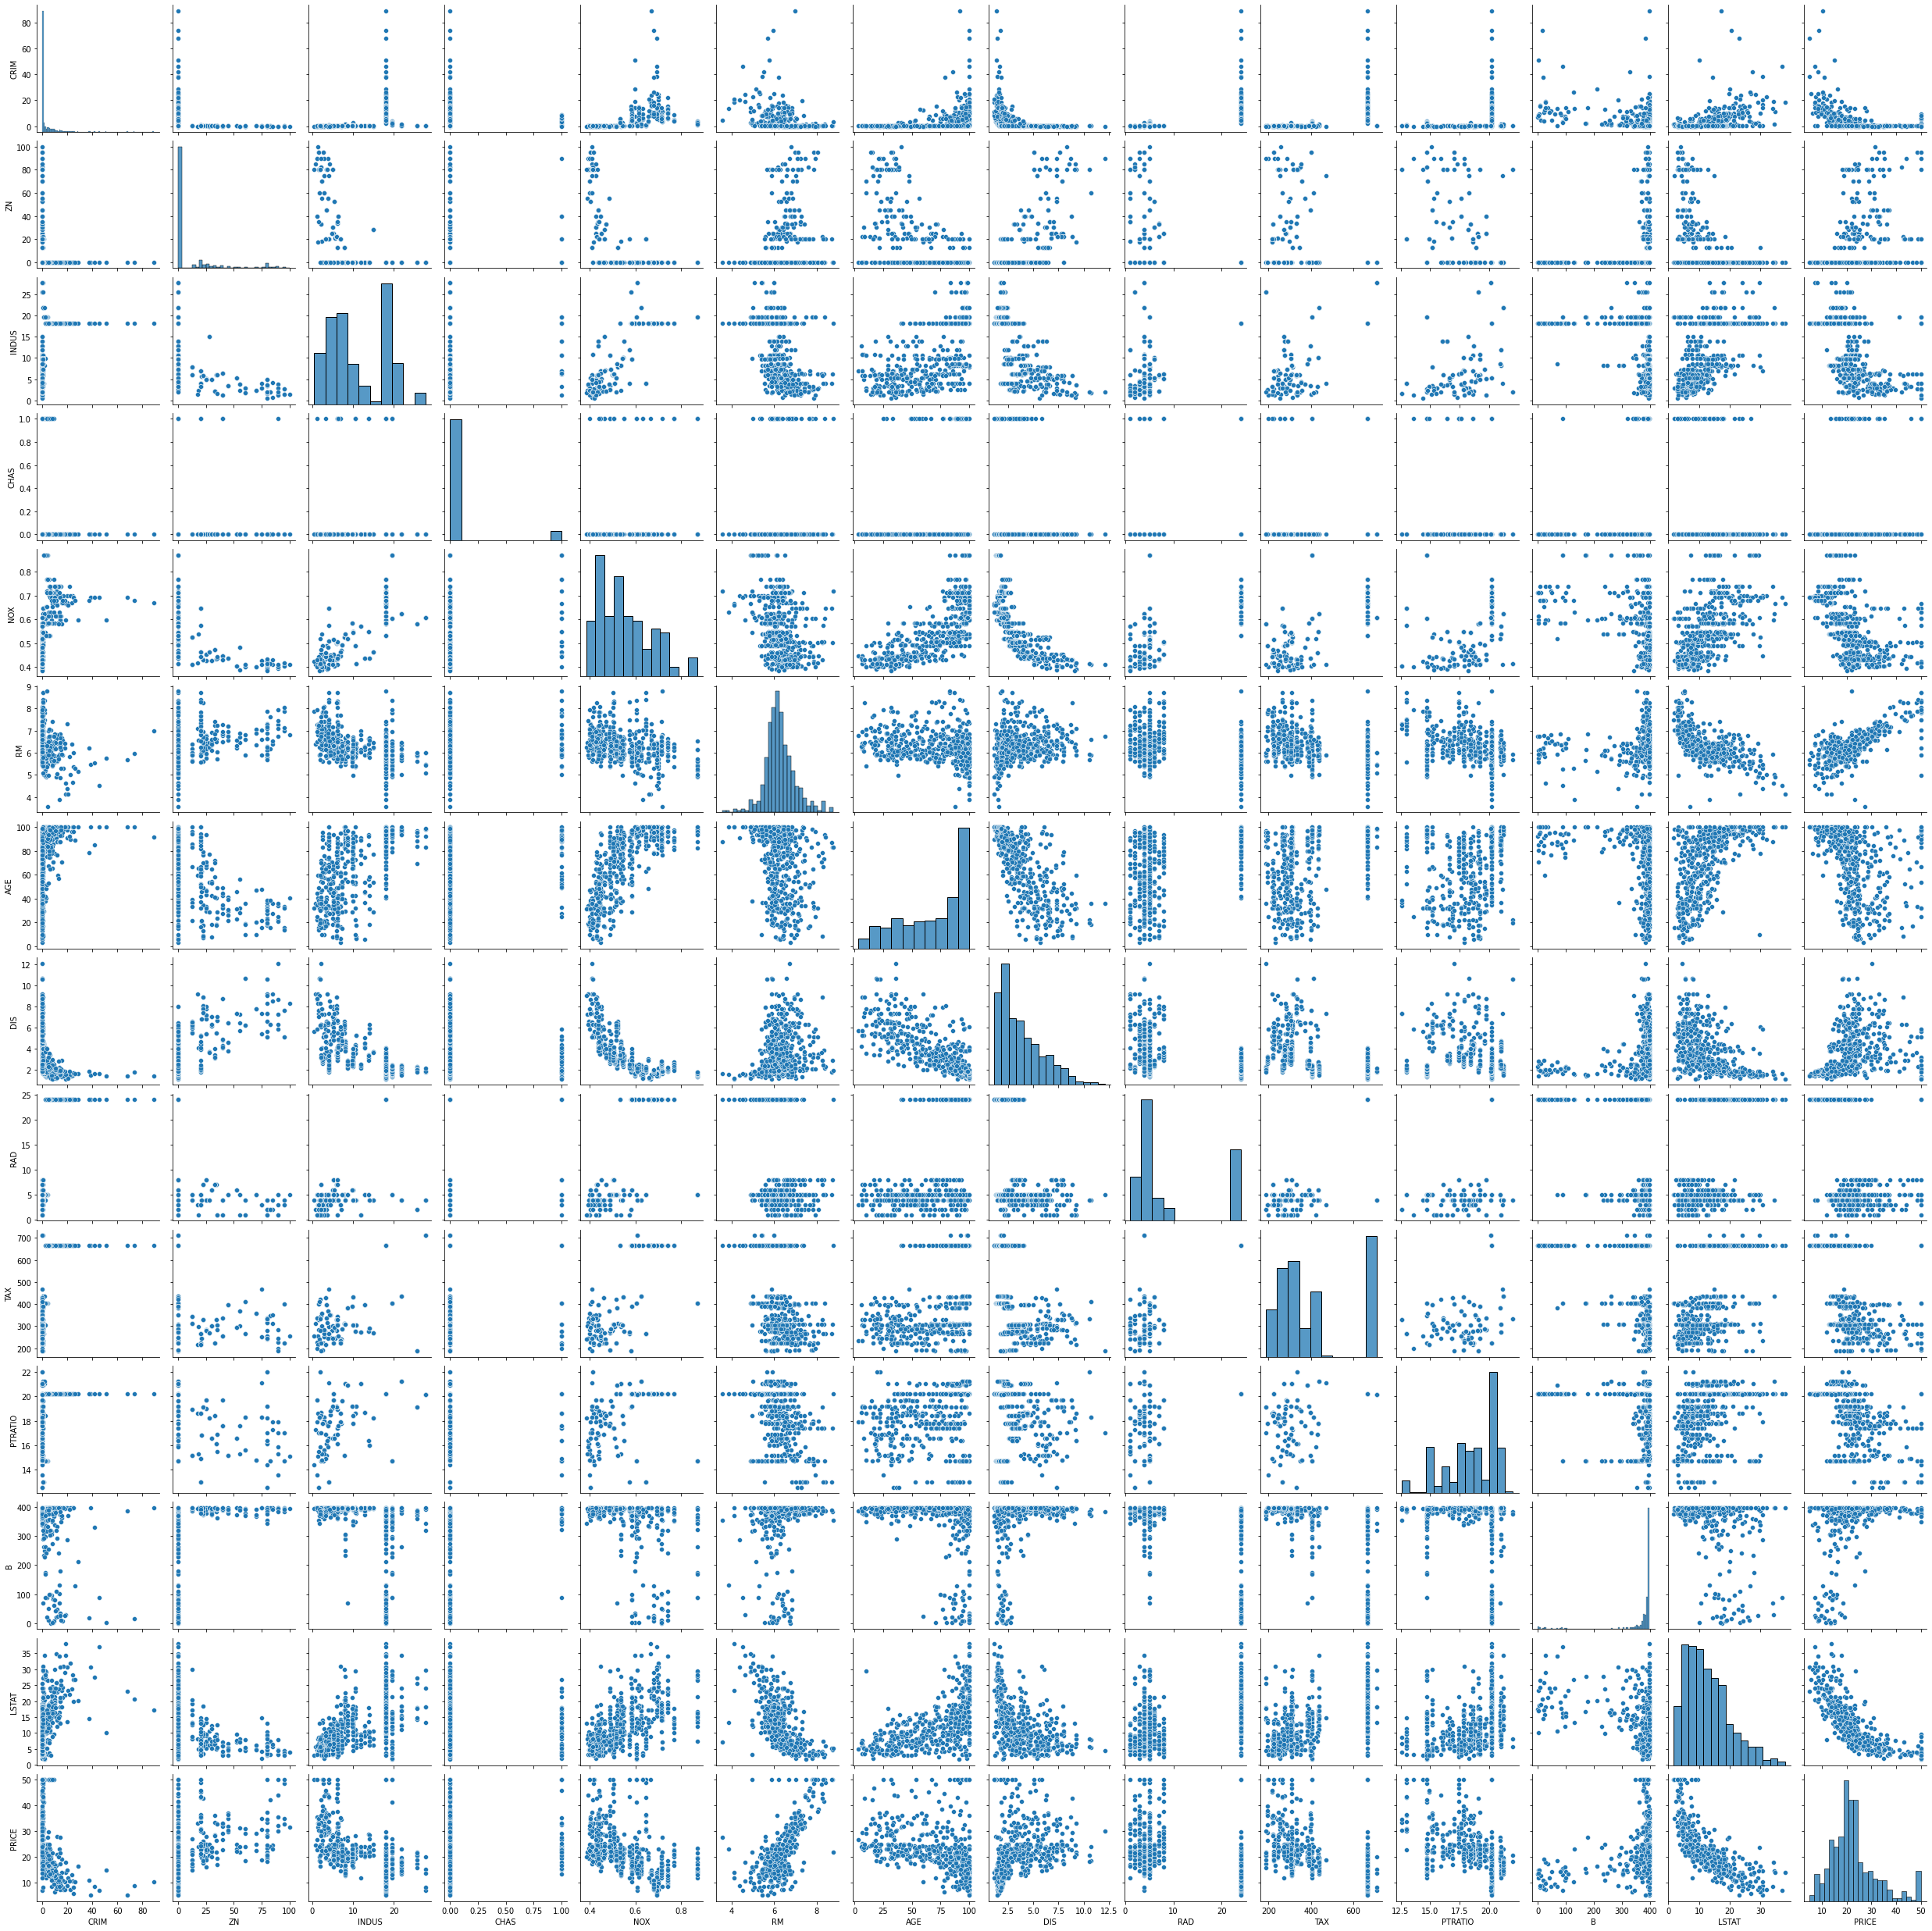

In [ ]:
# Runing a pair plot to all relationships between the features in one big chart using the Seaborn.pairplot() function
sns.pairplot(data)

# I can even include a regression line in each (but might be too clumsy, lets leave that for now)
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

You might have to zoom in or squint a bit. There are scatterplots between all the columns in our dataset. And here, look down the diagonal in the middle, we get histograms for all our columns.

**Now let's look at some of the relationships in more detail**


#### Distance from Employment vs. Pollution
 Let's compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution). Does pollution go up or down as the distance increases?

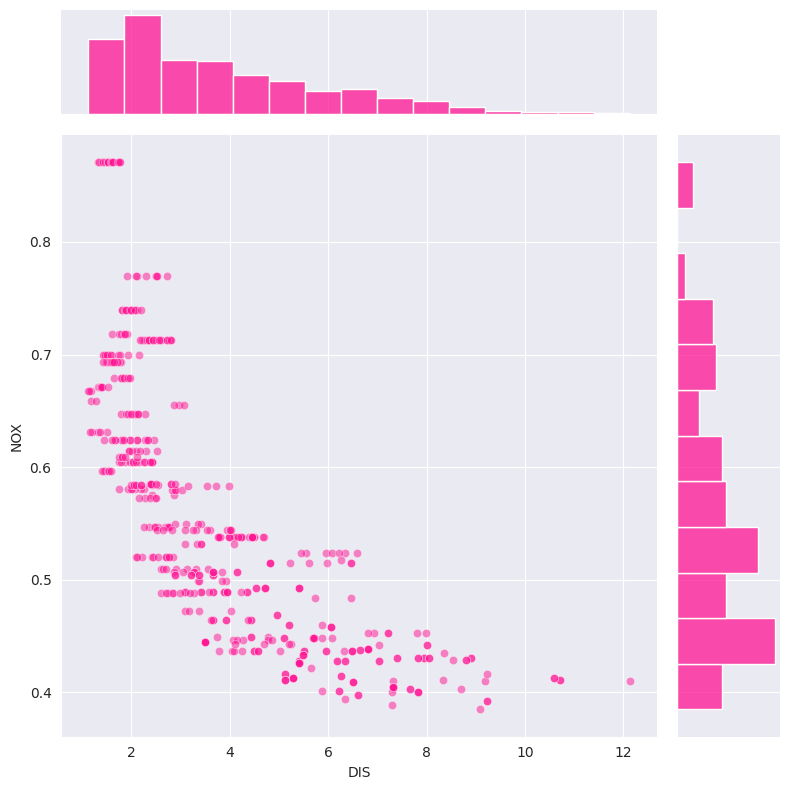

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'],  # I use here Seaborn's `.jointplot()`to bring the inherent distribution together with the scatter plots
                y=data['NOX'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})  # alpha = transparancy

plt.show()

We see that pollution goes down as we go further and further out of town. This makes intuitive sense. Was your prediction correct?  Notice also that even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, DIS of 9 miles and 12 miles have very similar levels of pollution.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

Let's now compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution). Does pollution go up or down as there is a higher proportion of industry? This seems obvious huh? You're right

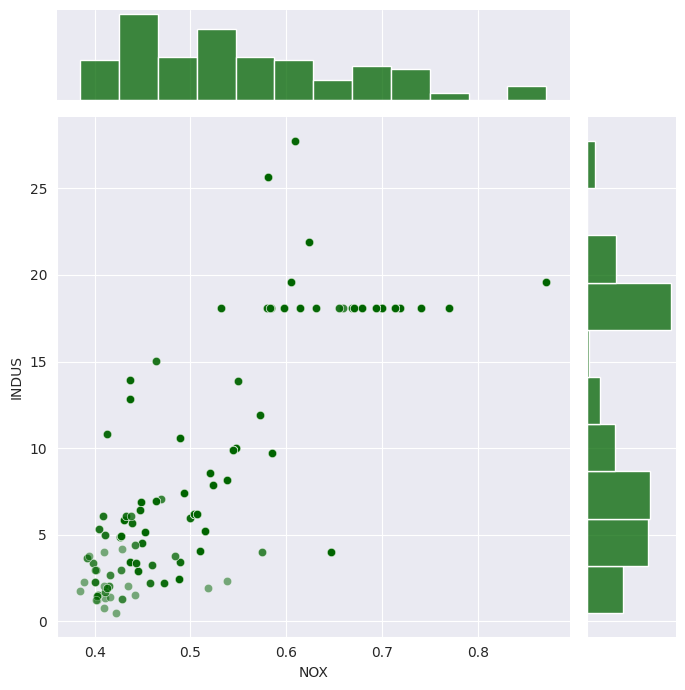

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX,
                y=data.INDUS,
                # kind='hex',
                height=7,
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms

Let's go again, let's compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's. How does the number of rooms per dwelling vary with the poverty index of the area? Do homes have more or fewer rooms when LSTAT is low? Let's answer this in the chart below

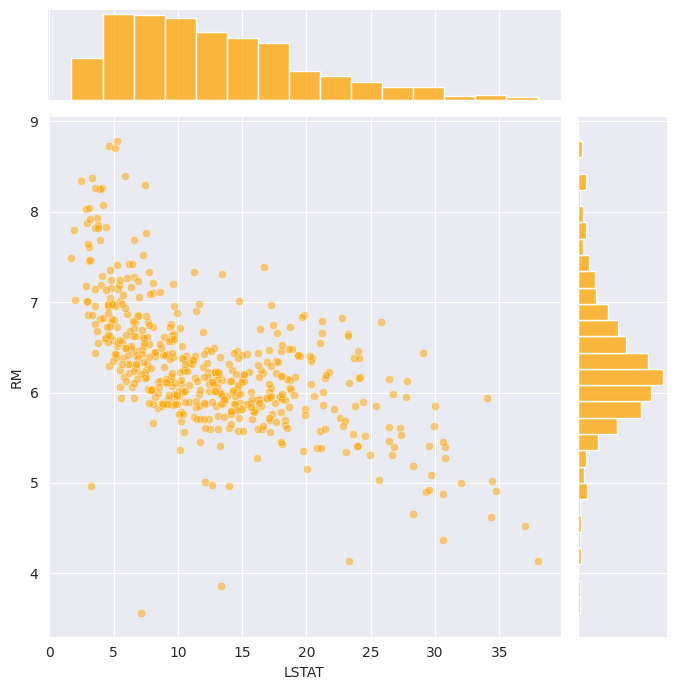

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'],
                y=data['RM'],
                # kind='hex',
                height=7,
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%. It is also obvious that there is no single property with more than 7 rooms in areas where poverty index is greater than 20%


#### Number of Rooms versus Home Value

Finally, let's compare RM (number of rooms) with PRICE. You can probably guess how the number of rooms affects home prices. 😊

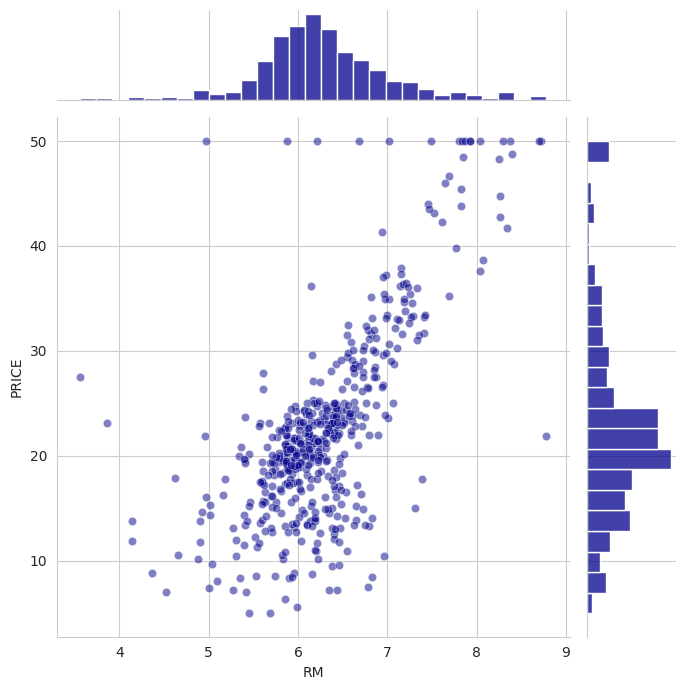

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM,
                y=data.PRICE,
                height=7,
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

Majority of homes valued above 40,000 had 7 or rooms

# Now let me build the model

# Step 1: Spliting Training & Test Dataset




In [ ]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,               # keeping the test data to 20%
                                                    random_state=10)             # controling the shuffling

With 13 features, my Regression model will take this form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

In [ ]:
# running the regression model:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')    # the proportion of variance in price explained by the features

Training data r-squared: 0.75


Checking whether the coefficients make sense and follow the pattern I discovered earlier.

In [ ]:
# getting the weights of each feature in the final values
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [ ]:
# what is the price to pay for having an extra room
premium = regr_coef.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### Checking the Estimated Values & Regression Residuals
the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$).





In [ ]:
# model's prediction and the residuals
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

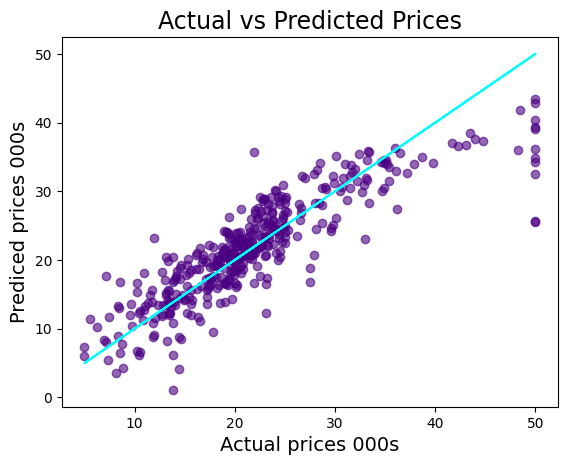

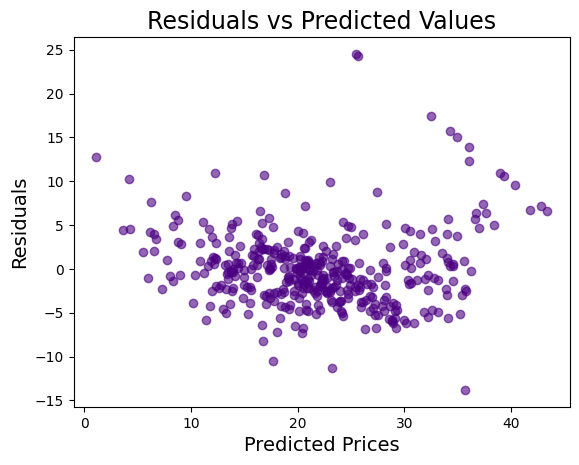

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices', fontsize=17)
plt.xlabel('Actual prices 000s', fontsize=14)        # y_train
plt.ylabel('Prediced prices 000s', fontsize=14) # y_hat
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

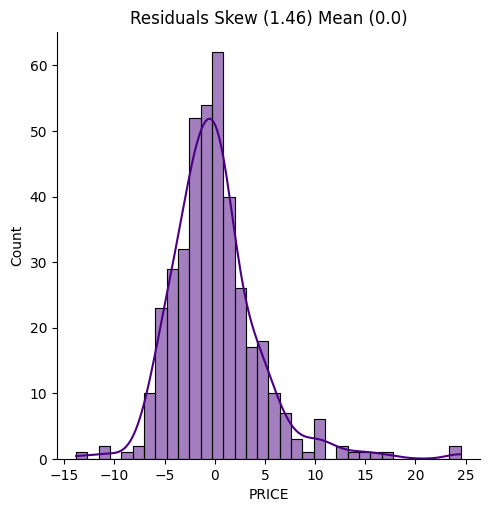

In [ ]:
# Checking the residuals for bias and normality
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The residuals have a skewness of 1.46. There may be a little bias. I'll check for improvement.   

### Data Transformations for a Better Fit

To make the model better, I can:

1. Change the model entirely by fitting a non-linear curve.
2. Transform our data to make it fit better with the linear model.

Here I choose data transformation. Specifically log transform


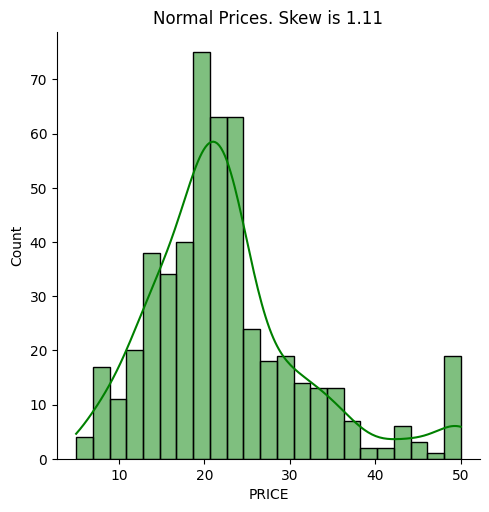

In [ ]:
# skew in the initial prices
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

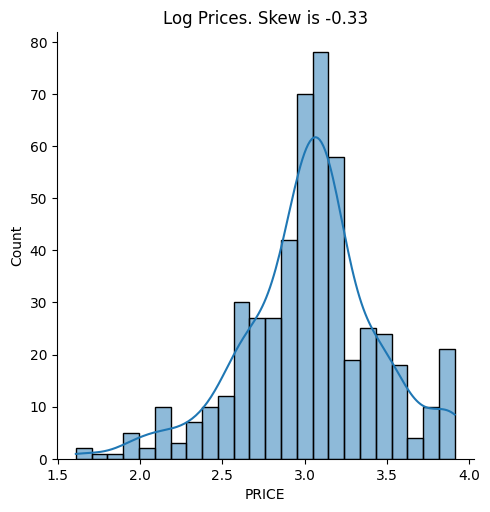

In [ ]:
# skew in the transformed prices
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices look like better candidate for use in our linear model. Let me check if the model's prediction improves using the log prices

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$




In [ ]:
# multi variable regression with log prices
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                    new_target,
                                                    test_size=0.2,
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


This time we got an r-squared of 0.79 compared to 0.75. This looks like a promising improvement.

## Evaluating Coefficients with Log Prices

Checking if my model's coefficients still have the expected sign?

Hint: Use a DataFrame to make the output look pretty.

In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00



From the coefficients, being close to the river results in higher property prices because CHAS has a coefficient greater than zero. My dream of having a house closer to the river means I must be prepared to pay more.


## Regression with Log Prices & Residual Plots

* comparing them with previous ones

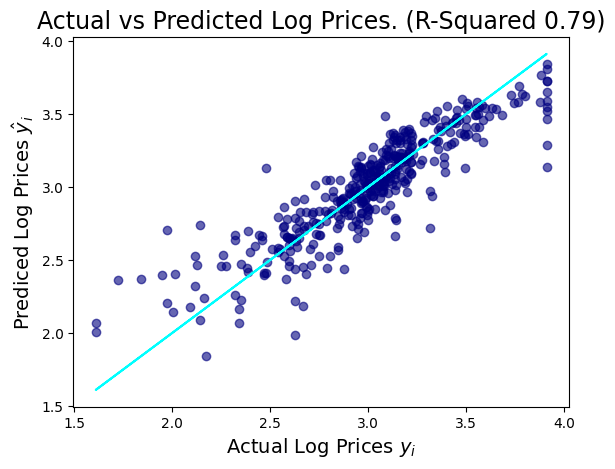

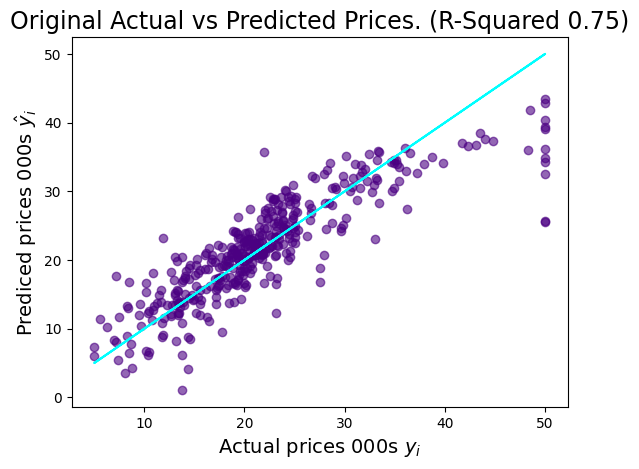

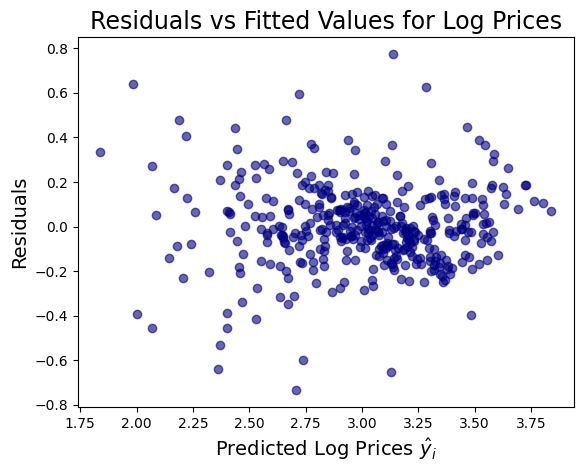

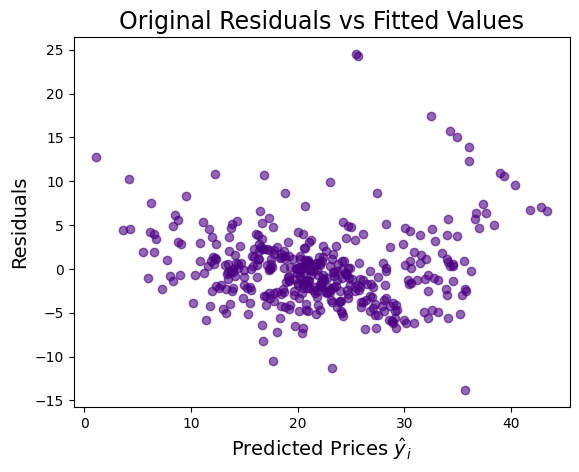

In [ ]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices. (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices. (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

The predicted values seems slightly closer to the cyan line. Let's check the mean and skew of transformed prices residuals.

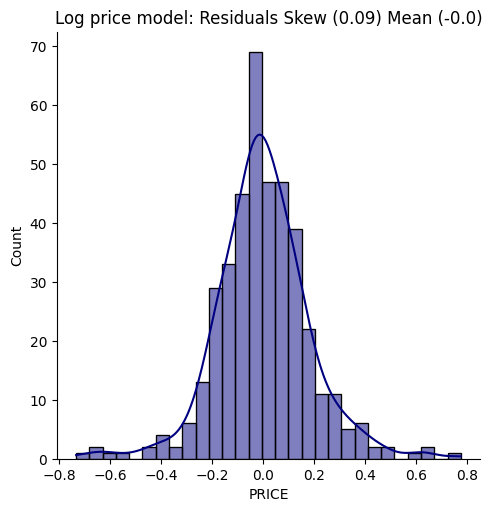

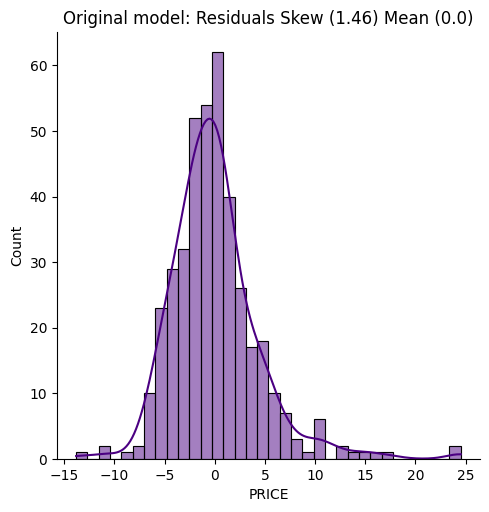

In [ ]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The new regression residuals have a skew of 0.09 compared to a skew of 1.46 for the original prices. From both a residuals perspective and an r-squared perspective the data transformation has improved the model.

# Compare Out of Sample Performance

*Seeing how the model performs on the test data set.


In [ ]:
# comparing the 2 models' r-squared values for the test data.
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}') # transformed data's model does a better prediction

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


Results from the test data shows that the r-squared is still high for the model with the transformed data. This means we have built a useful model which explains 74% of the variation in the value of the houses.

# Predicting a new Property's Value using the Regression Coefficients


In [ ]:
# what is the value of the average property.

# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
# property_stats


# Making the prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Actual Dollar Values
dollar_est = np.exp(log_estimate) * 1000
print(f'The avg property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The avg property is estimated to be worth $20703.2


In [ ]:
# keeping the average values of CRIM, RAD, INDUS, and valuing a property with the following characteristics:
# Defining the Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
# Set Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0


The end, we completed the model and made a valuable tool for house price prediction for Boston city. Next step is to prepare the model for deployment.
